In [1]:
# Importing all the necessay libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
# Load the dataset
data = pd.read_csv('hypotension_patients.csv')

In [3]:

# Demographics(Gender)
gender_counts = data['gender'].value_counts()
# Charlson Comorbidity Index
charlson_mode = data['charlson_comorbidity_index'].mode().values[0]
# APSIII
apsiii_mode = data['apsiii'].mode().values[0]
#LoS
los_mode = data['LoS'].mode().values[0]
# Anchor Age
age_mode = data['anchor_age'].mode().values[0]
# Patient Outcomes
in_icu_mortality_percentage = (data['dod'].notnull().sum() / data.shape[0]) * 100

# Calculate statistics for selected columns
selected_columns = ["anchor_age", "charlson_comorbidity_index", "apsiii", "LoS"]
selected_stats = data[selected_columns].describe()
# Display summary statistics
print(selected_stats)
print(f"Mode Charlson Comorbidity Index: {charlson_mode}")
print(f"Mode APSIII: {apsiii_mode}")
print(f"Mode LoS: {los_mode}")
print(f"Mode Anchor Age: {age_mode}")
print("\nGender Counts:\n", gender_counts)
print("\nIn-ICU Mortality Percentage: {:.2f}%".format(in_icu_mortality_percentage))

print("-----------------------------------------------------------------")
# Count missing values for each column
missing_values = data.isnull().sum()

# Display the number of missing values for each column
print("Missing Values for Each Column:")
print(missing_values)


        anchor_age  charlson_comorbidity_index       apsiii          LoS
count  5106.000000                  5106.00000  5106.000000  5106.000000
mean     65.552683                     5.21700    60.314532     7.053651
std      15.235907                     2.57691    28.860171     8.432716
min      18.000000                     0.00000     3.000000     0.040000
25%      56.000000                     4.00000    38.000000     1.960000
50%      67.000000                     5.00000    53.000000     4.130000
75%      77.000000                     7.00000    78.000000     8.960000
max      91.000000                    19.00000   189.000000   103.500000
Mode Charlson Comorbidity Index: 5
Mode APSIII: 37
Mode LoS: 1.92
Mode Anchor Age: 91

Gender Counts:
 M    2853
F    2253
Name: gender, dtype: int64

In-ICU Mortality Percentage: 64.43%
-----------------------------------------------------------------
Missing Values for Each Column:
ID                               0
anchor_age             

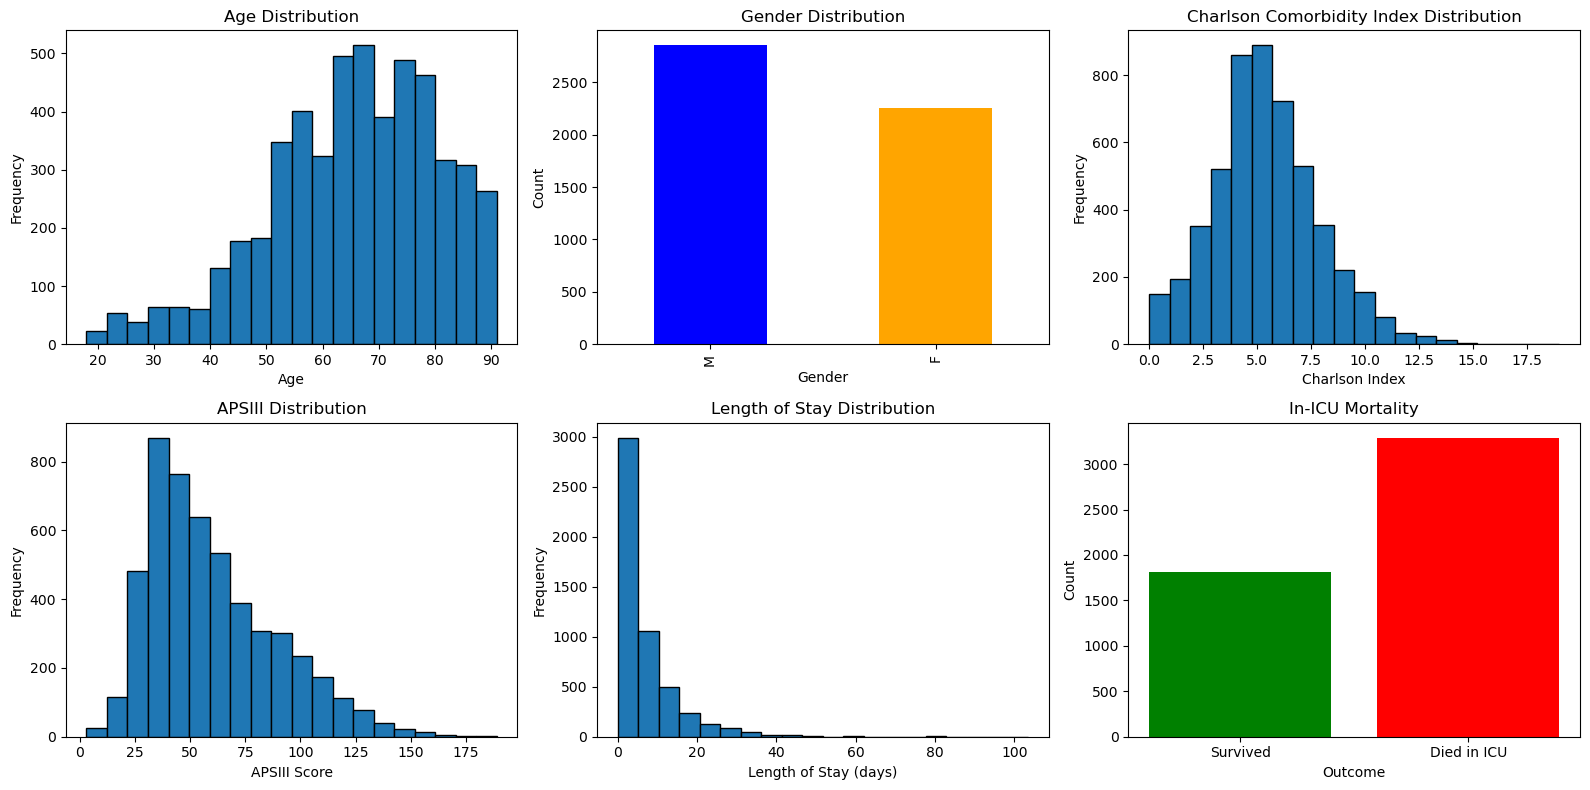

In [4]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
# Age distribution
axs[0, 0].hist(data['anchor_age'], bins=20, edgecolor='k')
axs[0, 0].set_title("Age Distribution")
axs[0, 0].set_xlabel("Age")
axs[0, 0].set_ylabel("Frequency")

# Gender distribution
gender_counts.plot(kind='bar', color=['blue', 'orange'], ax=axs[0, 1])
axs[0, 1].set_title("Gender Distribution")
axs[0, 1].set_xlabel("Gender")
axs[0, 1].set_ylabel("Count")

# Charlson Comorbidity Index distribution
axs[0, 2].hist(data['charlson_comorbidity_index'], bins=20, edgecolor='k')
axs[0, 2].set_title("Charlson Comorbidity Index Distribution")
axs[0, 2].set_xlabel("Charlson Index")
axs[0, 2].set_ylabel("Frequency")

# APSIII distribution
axs[1, 0].hist(data['apsiii'], bins=20, edgecolor='k')
axs[1, 0].set_title("APSIII Distribution")
axs[1, 0].set_xlabel("APSIII Score")
axs[1, 0].set_ylabel("Frequency")

# Length of Stay distribution
axs[1, 1].hist(data['LoS'], bins=20, edgecolor='k')
axs[1, 1].set_title("Length of Stay Distribution")
axs[1, 1].set_xlabel("Length of Stay (days)")
axs[1, 1].set_ylabel("Frequency")

# In-ICU Mortality
axs[1, 2].bar(["Survived", "Died in ICU"], [data['dod'].isnull().sum(), data['dod'].notnull().sum()], color=['green', 'red'])
axs[1, 2].set_title("In-ICU Mortality")
axs[1, 2].set_xlabel("Outcome")
axs[1, 2].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [5]:
# Convert "gender" column to numerical values
data['gender'] = data['gender'].map({'M': 1, 'F': 2})
# Convert dod column to numerical values (1 - patient is alive, 2 - patient is deceased)
data['dod'] = data['dod'].apply(lambda x: 1 if pd.isna(x) else 2)

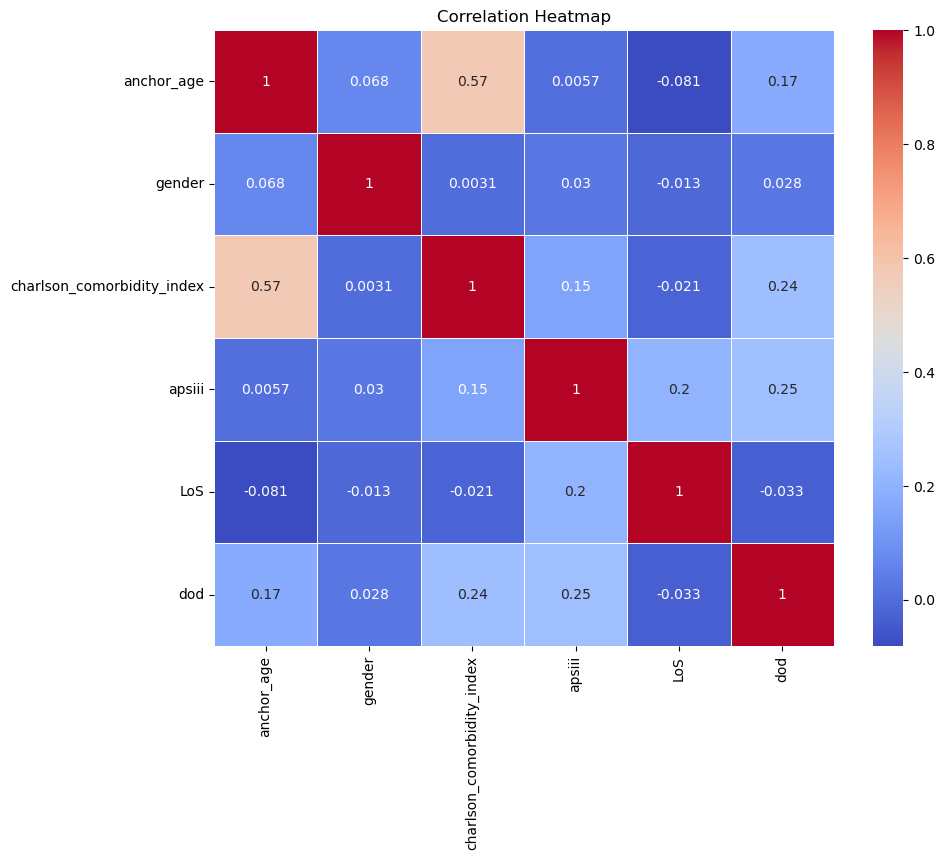

In [6]:
# Compute the correlation matrix
features = ["anchor_age","gender", "charlson_comorbidity_index", "apsiii", "LoS", "dod"]
corr_matrix = data[features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**1) Describe via summary statistics the main properties of the profound hypotension cohort:** <br><br>
The dataset provided focuses on patients dealing with hypotension, featuring diverse demographic and clinical information. Patient ages span from 18 to 91 years, showcasing a broad age range. The Charlson Comorbidity Index, ranging from 0 to 19, serves as an indicator of comorbidity severity. Meanwhile, the APSIII score assesses illness severity, and Length of Stay (LoS) denotes the duration patients spend in the ICU. Notably, the dataset is gender-imbalanced, with 2,853 males and 2,253 females, while the In-ICU mortality rate stands at 64.43%, suggesting a higher number of patient deaths. The data distribution plots show that age has a negative skew, with the majority of individuals being older, especially above 50. In contrast, the Charlson Comorbidity Index, Length of Stay (LoS), and APSIII score are positively skewed, indicating a concentration of cases with lower comorbidity, shorter ICU stays, and less severe illness. The correlation heatmap shows a noteworthy 0.57 correlation between the Charlson Comorbidity Index and patient age, along with slight positive correlations of 0.2 between APSIII and Length of Stay (LoS) and 0.25 between APSIII and Date of Discharge (DoD). While not very strong, these correlations hint at potential distinct patient subgroups in the dataset.

Sorted k Values based on Silhouette Score (Highest to Lowest): [2, 3, 5, 4, 9, 7, 6, 8, 10, 11]
Corresponding Silhouette Scores: [0.4638435184802785, 0.3183293147902943, 0.3000407460446065, 0.29927124932797605, 0.2873372971703843, 0.2816497050028472, 0.28123624695203586, 0.2773049000545051, 0.27397550531280496, 0.26780982030843203]


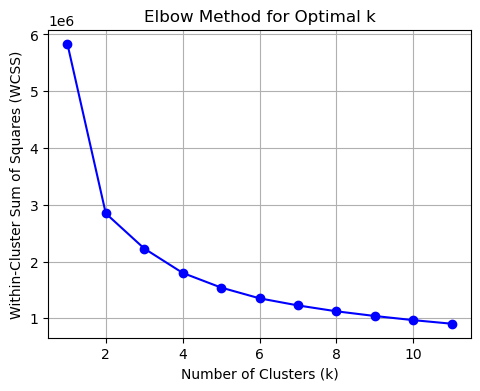

In [7]:
# Select relevant features for clustering
X = data[features]
# Lists to store WCSS and silhouette scores for different values of k
wcss = []
silhouette_scores = []
k_values = []

for k in range(1, 12):  
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    
    # Calculate cluster compactness (inertia)
    wcss.append(kmeans.inertia_)
    
    # Calculate cluster separability (silhouette score)
    if k != 1:
        silhouette = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(silhouette)
        k_values.append(k)

# Sort k_values and silhouette_scores in descending order based on silhouette score
sorted_indices = sorted(range(len(silhouette_scores)), key=lambda i: silhouette_scores[i], reverse=True)
sorted_k_values = [k_values[i] for i in sorted_indices]
sorted_silhouette_scores = [silhouette_scores[i] for i in sorted_indices]

# Plot the WCSS values to find the elbow point
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 12), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)

# Print sorted k_values and corresponding silhouette scores
print("Sorted k Values based on Silhouette Score (Highest to Lowest):", sorted_k_values)
print("Corresponding Silhouette Scores:", sorted_silhouette_scores)

# Selecting the top 2 k values
k_values = sorted_k_values[:2]


Cluster 2 Compactness (Inertia): 2480292.5162312915
Cluster 2 Separability (Silhouette Score): 0.49180829033822565


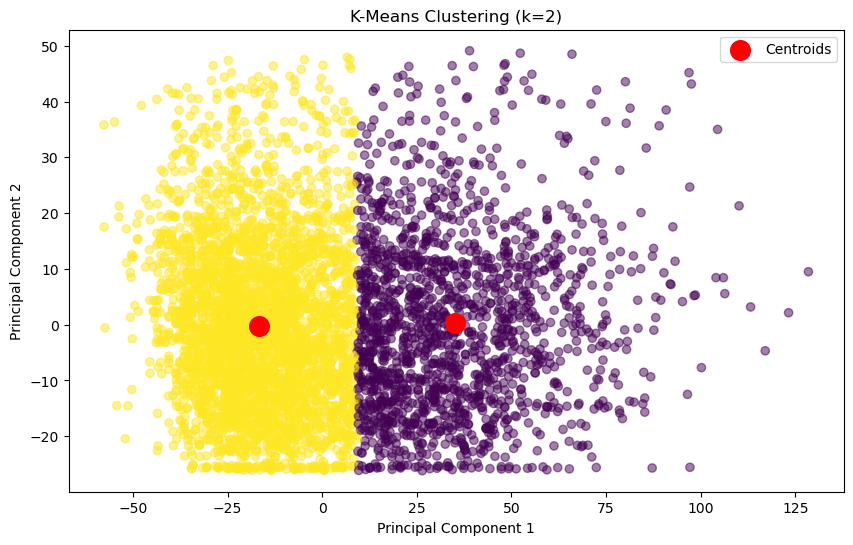

Cluster 3 Compactness (Inertia): 1864094.1766288714
Cluster 3 Separability (Silhouette Score): 0.36255077616482234


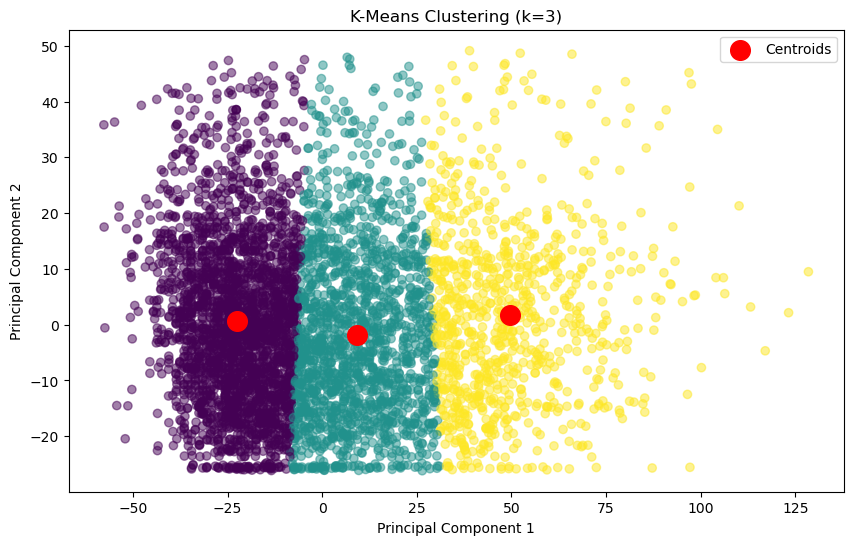

In [8]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

for i in k_values:
    # Perform K-Means clustering with the current value of k
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(X_pca)
    data_1 = data.copy()
    
    # Add cluster labels to the original data
    data_1['cluster'] = kmeans.labels_
    
    # Calculate cluster compactness (inertia)
    compactness = kmeans.inertia_
    
    # Calculate cluster separability (silhouette score)
    silhouette = silhouette_score(X_pca, kmeans.labels_)

    print(f'Cluster {i} Compactness (Inertia): {compactness}')
    print(f'Cluster {i} Separability (Silhouette Score): {silhouette}')

    # Plot the clusters when k=i
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
    plt.title(f'K-Means Clustering (k={i})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

**2) Perform k-means clustering to identify subgroups of patients:** <br><br>The elbow plot provided above illustrates potential k values for the k-means algorithm. It's evident that values 2, 3, 4, and 5 could be reasonable choices. To refine this selection, we calculated the silhouette score, which assesses the separability of cluster centroids. Notably, a k value of 2 yielded the highest separability score, achieving a value of 0.46, followed by k value of 3 with a score of 0.31. Consequently, these two k values, 2 and 3, were chosen for further analysis.<br>
For the purpose of cluster visualization, Principal Component Analysis (PCA) was employed to reduce the dataset's dimensionality to 2. The results showed that for k value of 2, even after PCA, the separability score remained the highest at 0.49, while for k value of 3, the score was 0.36. This suggests that, even after PCA, a k value of 2 is the most appropriate choice.
However, it's evident from the cluster plots, that the clustering is not yet optimal for either k value. Therefore, further analysis was conducted to gain a deeper understanding of the data distribution within the clusters.


#############################################################################################################
#############################################################################################################
################################################ k = 2 ######################################################
#############################################################################################################
#############################################################################################################
Cluster 2 Compactness (Inertia): 2847771.869447808
Cluster 2 Separability (Silhouette Score): 0.4638435184802785
______________________________________________________________________________________________________________
Summary Statistics for Cluster 0
______________________________________________________________________________________________________________
        anchor_age  charlson_comorbidity_index       apsiii          LoS
count  34

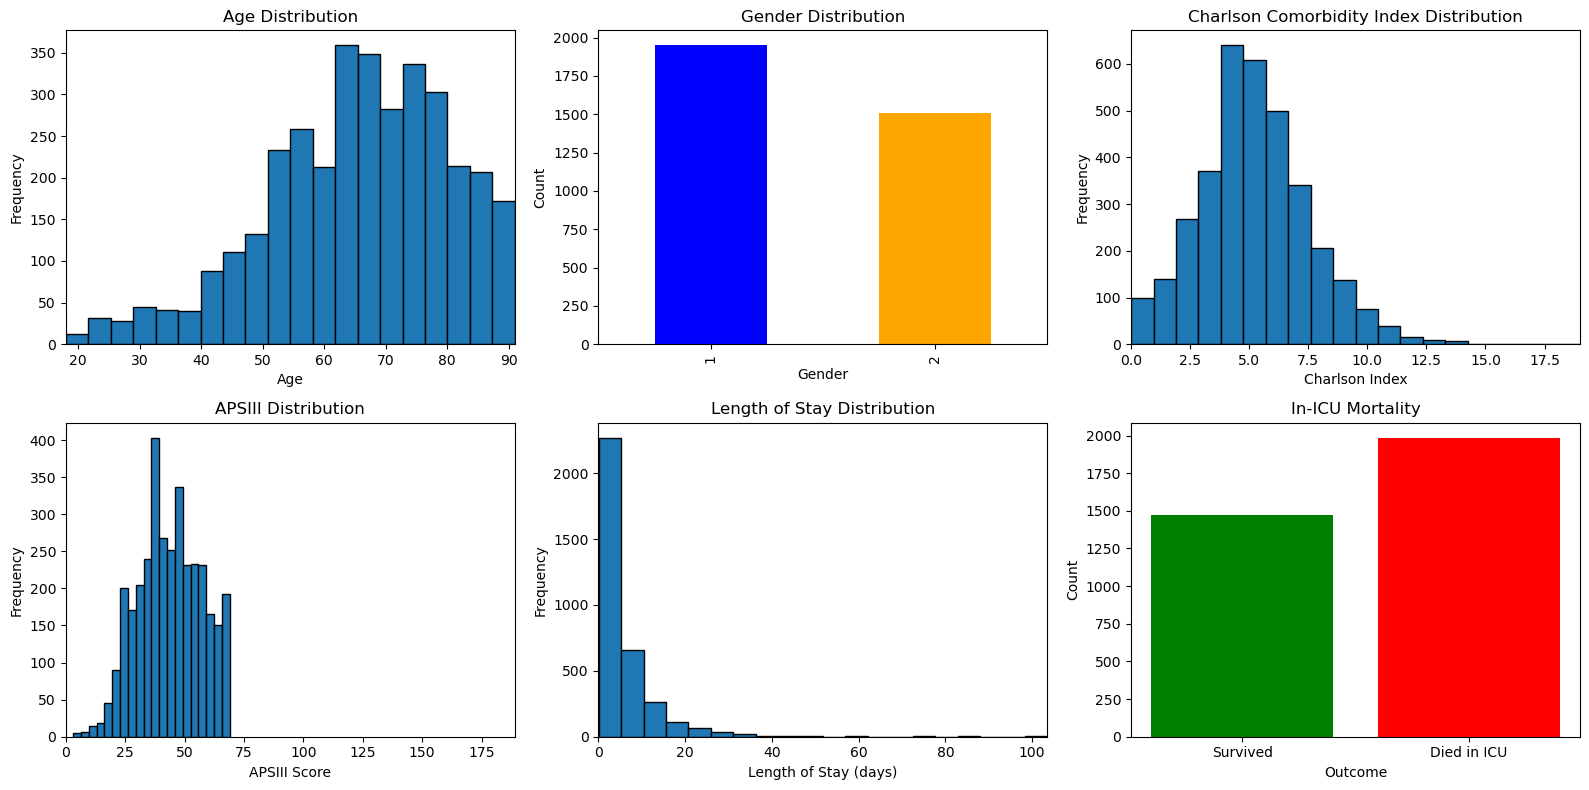

______________________________________________________________________________________________________________
Summary Statistics for Cluster 1
______________________________________________________________________________________________________________
        anchor_age  charlson_comorbidity_index       apsiii          LoS
count  1649.000000                 1649.000000  1649.000000  1649.000000
mean     65.354154                    5.676167    95.263796     9.365434
std      15.670631                    2.787049    20.026352     9.572217
min      19.000000                    0.000000    67.000000     0.170000
25%      55.000000                    4.000000    79.000000     2.790000
50%      67.000000                    5.000000    91.000000     6.420000
75%      78.000000                    7.000000   107.000000    12.920000
max      91.000000                   16.000000   189.000000    79.080000
Mode Charlson Comorbidity Index: 5
Mode APSIII: 71
Mode LoS: 0.96
Mode Anchor Age: 91




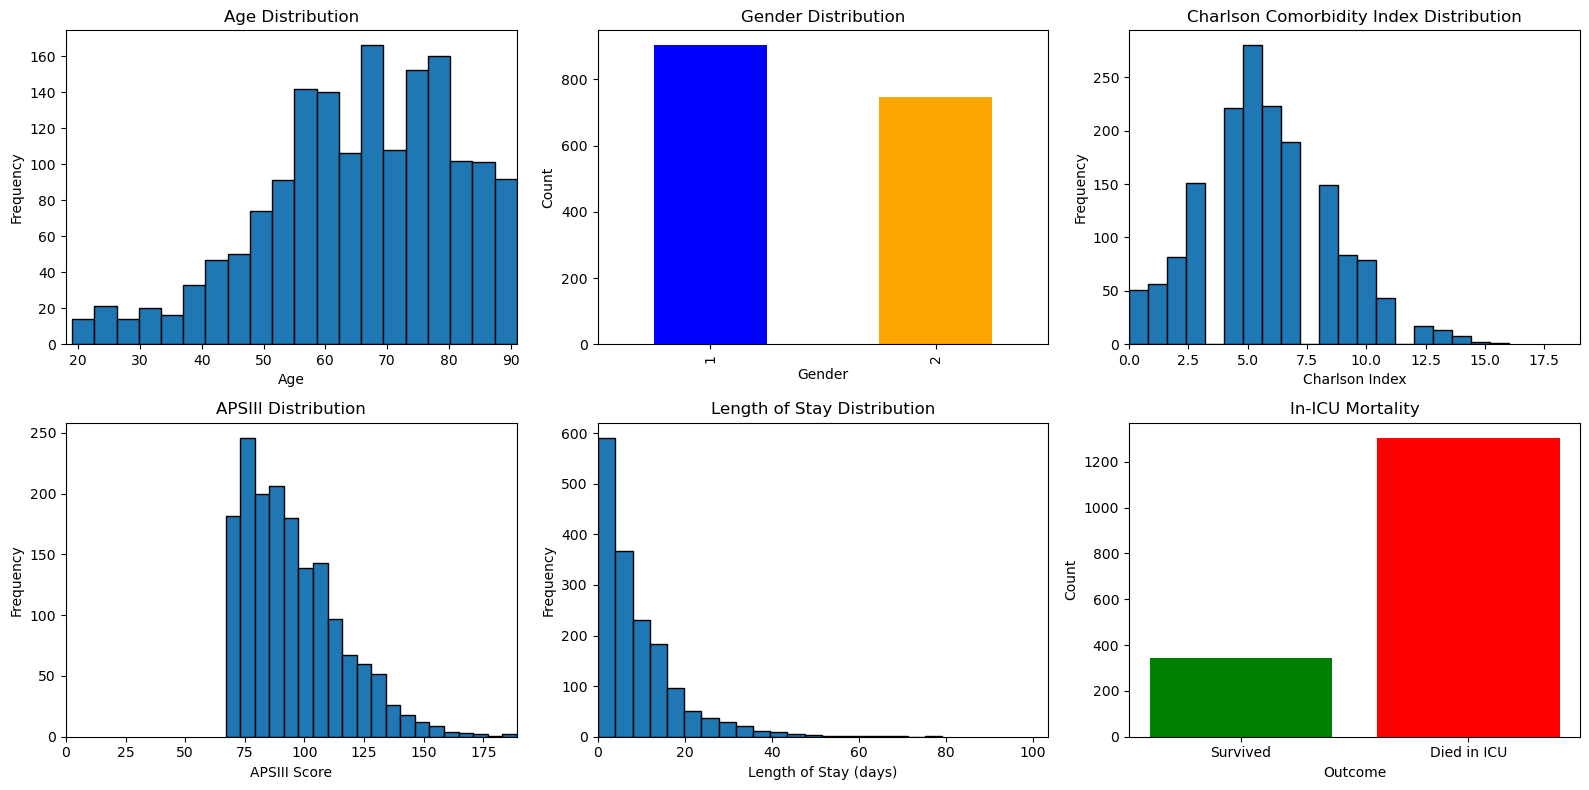

#############################################################################################################
#############################################################################################################
################################################ k = 3 ######################################################
#############################################################################################################
#############################################################################################################
Cluster 3 Compactness (Inertia): 2230189.0251291203
Cluster 3 Separability (Silhouette Score): 0.3183293147902943
______________________________________________________________________________________________________________
Summary Statistics for Cluster 0
______________________________________________________________________________________________________________
       anchor_age  charlson_comorbidity_index      apsiii         LoS
count  961.

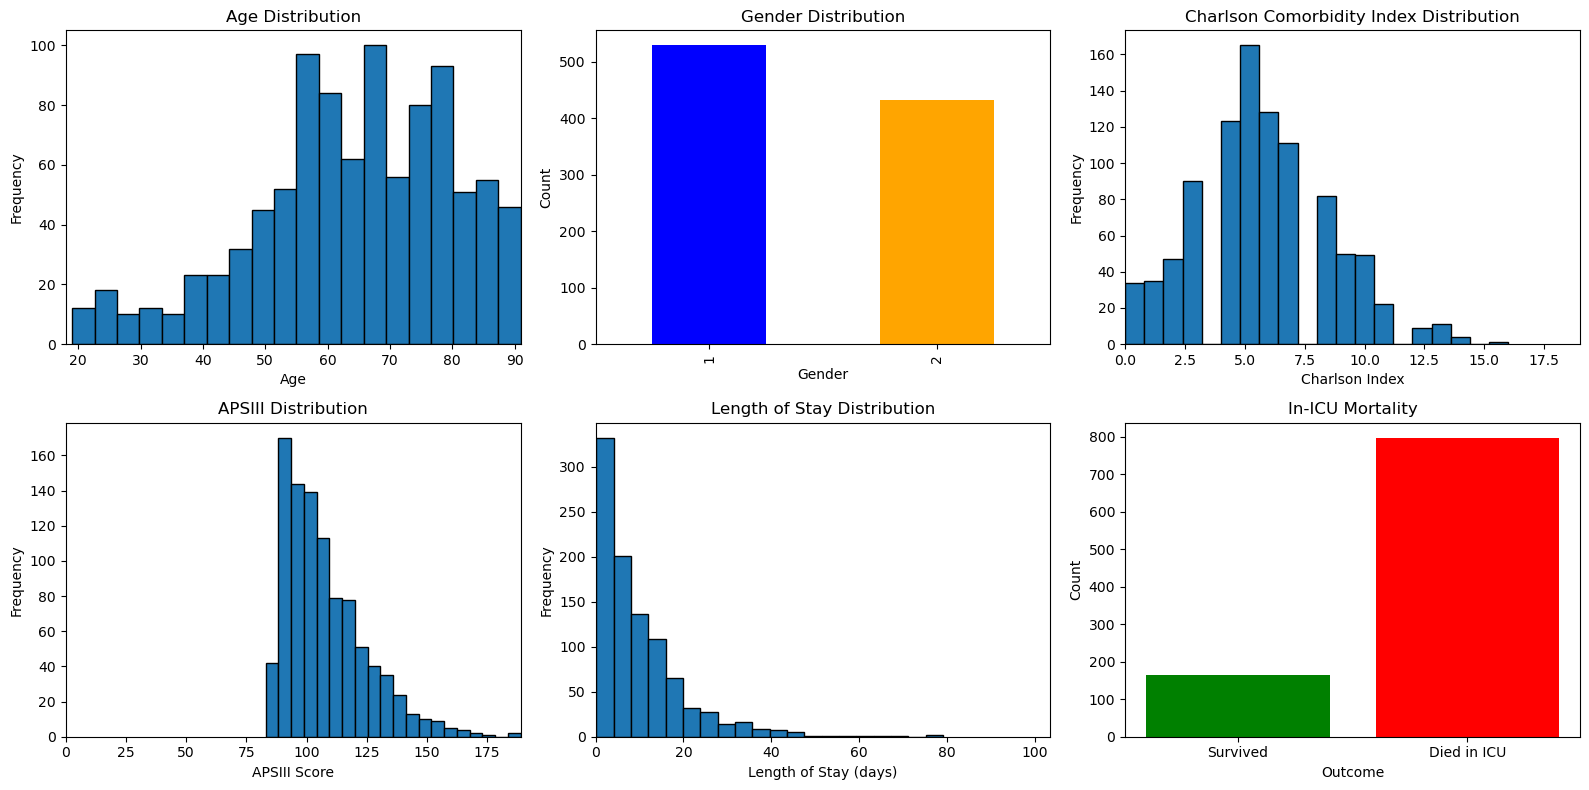

______________________________________________________________________________________________________________
Summary Statistics for Cluster 1
______________________________________________________________________________________________________________
        anchor_age  charlson_comorbidity_index       apsiii          LoS
count  1728.000000                 1728.000000  1728.000000  1728.000000
mean     67.931134                    5.578704    66.775463     7.939508
std      14.894938                    2.569846    10.404580     8.710023
min      18.000000                    0.000000    44.000000     0.210000
25%      58.750000                    4.000000    58.000000     2.580000
50%      70.000000                    5.000000    66.000000     5.170000
75%      80.000000                    7.000000    75.000000    10.092500
max      91.000000                   15.000000    89.000000   103.500000
Mode Charlson Comorbidity Index: 5
Mode APSIII: 53
Mode LoS: 1.83
Mode Anchor Age: 91




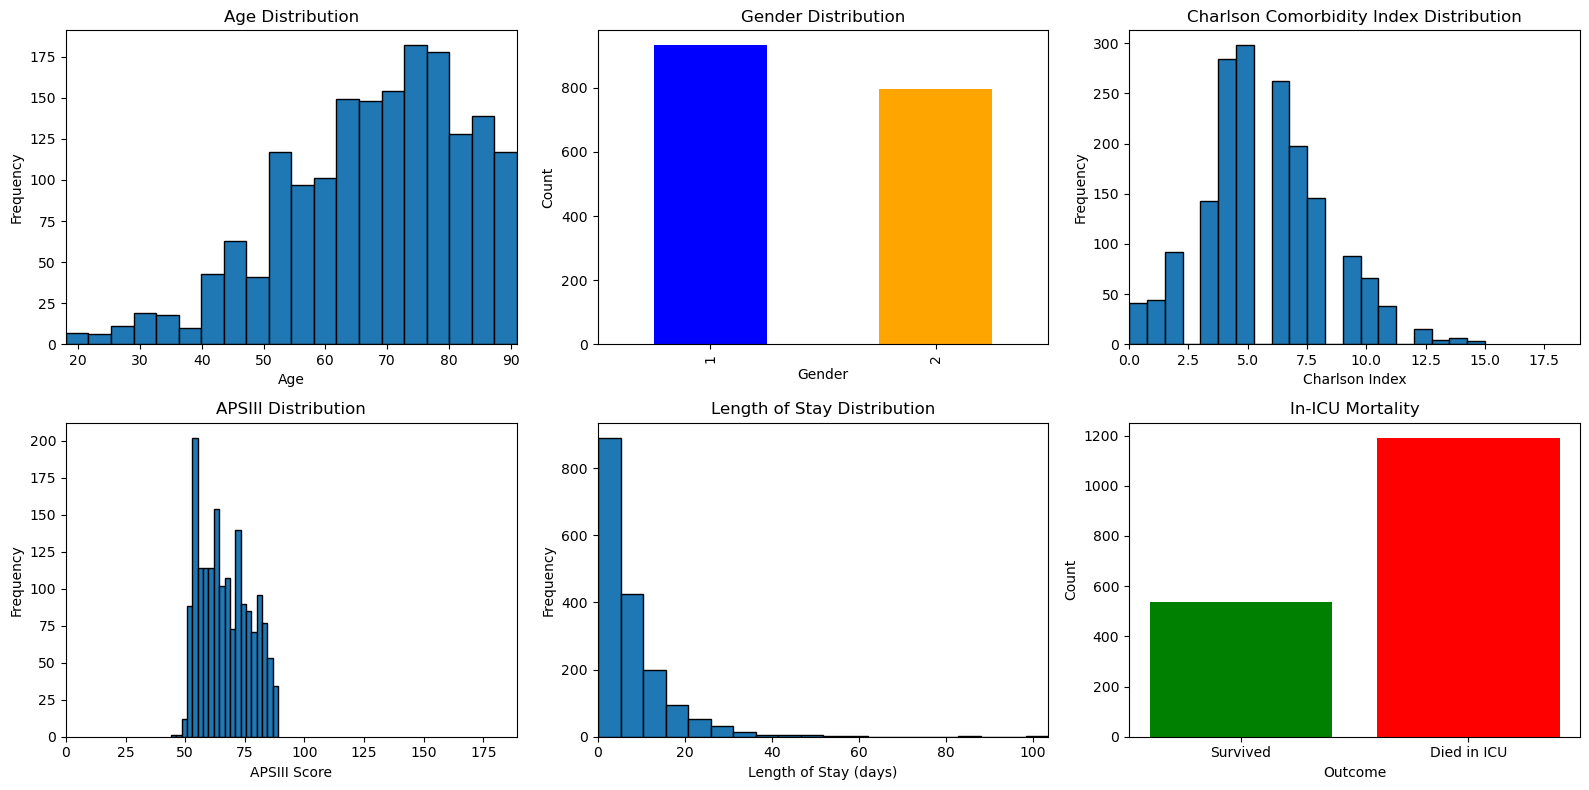

______________________________________________________________________________________________________________
Summary Statistics for Cluster 2
______________________________________________________________________________________________________________
        anchor_age  charlson_comorbidity_index       apsiii          LoS
count  2417.000000                 2417.000000  2417.000000  2417.000000
mean     64.439388                    4.789408    36.817542     5.253219
std      14.922196                    2.408577     9.359729     6.813508
min      18.000000                    0.000000     3.000000     0.040000
25%      55.000000                    3.000000    30.000000     1.670000
50%      66.000000                    5.000000    37.000000     3.000000
75%      76.000000                    6.000000    44.000000     6.040000
max      91.000000                   19.000000    56.000000    86.830000
Mode Charlson Comorbidity Index: 4
Mode APSIII: 37
Mode LoS: 2.08
Mode Anchor Age: 67




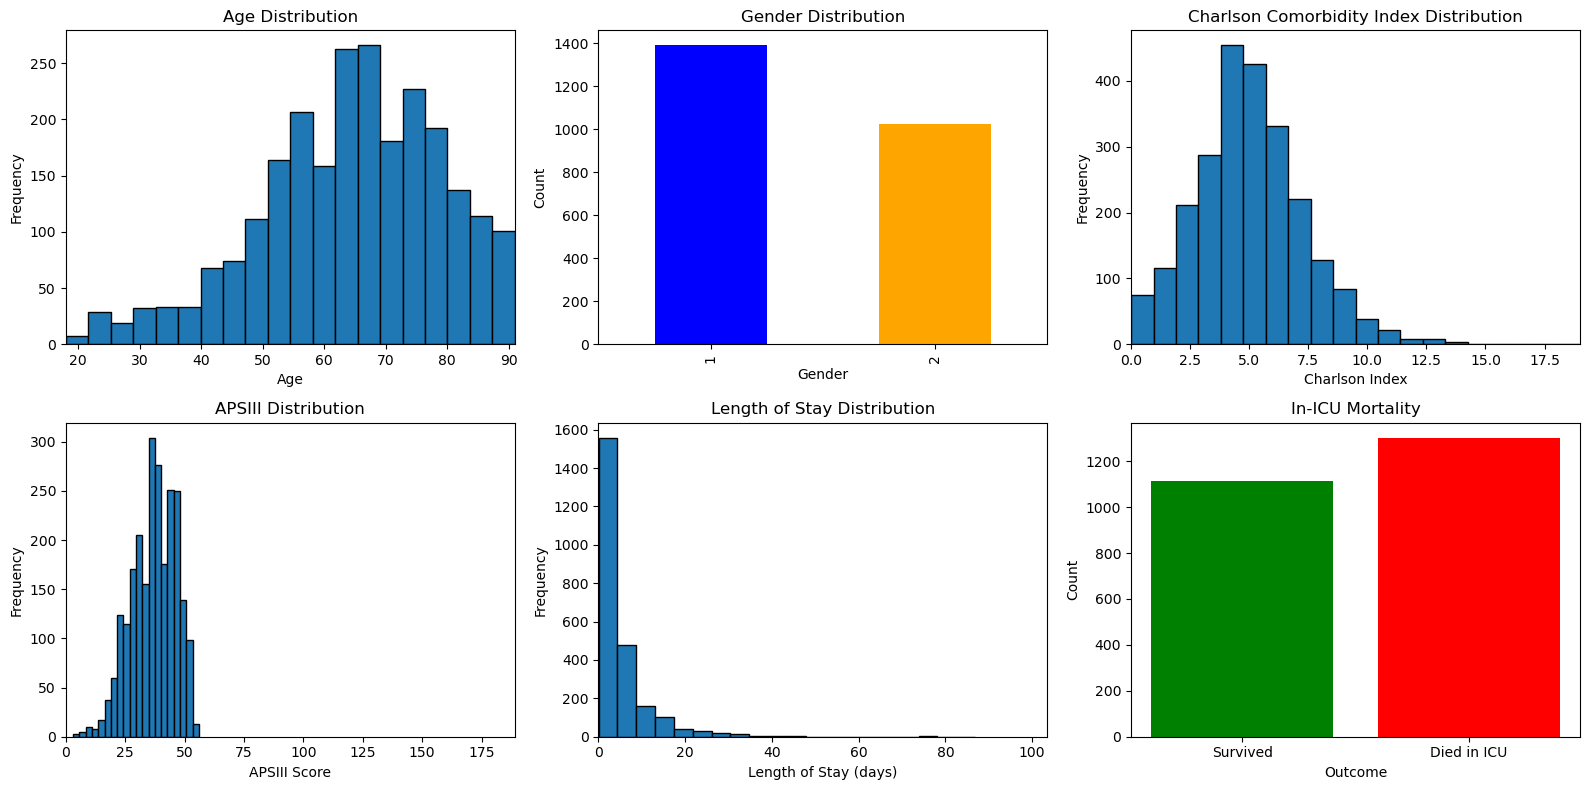

In [9]:
for k in k_values:
    # Perform K-Means clustering for the current value of k
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    # Assign the cluster labels to the original DataFrame
    data[f'Cluster{k}'] = cluster_labels
    print(f'#############################################################################################################')
    print(f'#############################################################################################################')
    print(f'################################################ k = {k} ######################################################')
    print(f'#############################################################################################################')
    print(f'#############################################################################################################')

    # Calculate cluster compactness (Inertia)
    compactness = kmeans.inertia_
    print(f'Cluster {k} Compactness (Inertia): {compactness}')

    # Calculate cluster separability (Silhouette Score)
    silhouette = silhouette_score(X, cluster_labels)
    print(f'Cluster {k} Separability (Silhouette Score): {silhouette}')

    # Additional analysis for each cluster
    for i in range(k):
        cluster = data[data[f'Cluster{k}'] == i]

        print('______________________________________________________________________________________________________________')
        print(f'Summary Statistics for Cluster {i}')
        print('______________________________________________________________________________________________________________')
        # Calculate summary statistics for each cluster
        selected_columns = ["anchor_age", "charlson_comorbidity_index", "apsiii", "LoS"]
        selected_stats = cluster[selected_columns].describe()
        print(selected_stats)

        # Calculate mode values for this cluster
        charlson_mode = cluster['charlson_comorbidity_index'].mode().values[0]
        apsiii_mode = cluster['apsiii'].mode().values[0]
        los_mode = cluster['LoS'].mode().values[0]
        age_mode = cluster['anchor_age'].mode().values[0]
        print(f"Mode Charlson Comorbidity Index: {charlson_mode}")
        print(f"Mode APSIII: {apsiii_mode}")
        print(f"Mode LoS: {los_mode}")
        print(f"Mode Anchor Age: {age_mode}")
        print('\n')

        # Demographics (Gender)
        gender_counts = cluster['gender'].value_counts()
        print("\nGender Counts:\n", gender_counts)

        # Calculate the number of people dead and alive in the cluster
        alive_count = cluster[cluster['dod'] == 1].shape[0]
        dead_count = cluster[cluster['dod'] == 2].shape[0]
        print(f"\nNumber of People Dead in Cluster {i}: {dead_count}")
        print(f"Number of People Alive in Cluster {i}: {alive_count}")

        in_icu_mortality_percentage = (dead_count / (dead_count + alive_count)) * 100
        print("\nIn-ICU Mortality Percentage: {:.2f}%".format(in_icu_mortality_percentage))

    
        print('______________________________________________________________________________________________________________')
        print(f'EDA Plots for Cluster {i}')
        print('______________________________________________________________________________________________________________')
        # Create subplots
        fig, axs = plt.subplots(2, 3, figsize=(16, 8))

        # Age distribution
        axs[0, 0].hist(cluster['anchor_age'], bins=20, edgecolor='k')
        axs[0, 0].set_title("Age Distribution")
        axs[0, 0].set_xlabel("Age")
        axs[0, 0].set_ylabel("Frequency")
        axs[0, 0].set_xlim(X['anchor_age'].min(), X['anchor_age'].max())  # Set x-axis limits

        # Demographics(Gender)
        gender_counts = cluster['gender'].value_counts()
        # Gender distribution
        gender_counts.plot(kind='bar', color=['blue', 'orange'], ax=axs[0, 1])
        axs[0, 1].set_title("Gender Distribution")
        axs[0, 1].set_xlabel("Gender")
        axs[0, 1].set_ylabel("Count")

        # Charlson Comorbidity Index distribution
        axs[0, 2].hist(cluster['charlson_comorbidity_index'], bins=20, edgecolor='k')
        axs[0, 2].set_title("Charlson Comorbidity Index Distribution")
        axs[0, 2].set_xlabel("Charlson Index")
        axs[0, 2].set_ylabel("Frequency")
        axs[0, 2].set_xlim(0, X['charlson_comorbidity_index'].max())  # Set x-axis limits

        # APSIII distribution
        axs[1, 0].hist(cluster['apsiii'], bins=20, edgecolor='k')
        axs[1, 0].set_title("APSIII Distribution")
        axs[1, 0].set_xlabel("APSIII Score")
        axs[1, 0].set_ylabel("Frequency")
        axs[1, 0].set_xlim(0, X['apsiii'].max())  # Set x-axis limits

        # Length of Stay distribution
        axs[1, 1].hist(cluster['LoS'], bins=20, edgecolor='k')
        axs[1, 1].set_title("Length of Stay Distribution")
        axs[1, 1].set_xlabel("Length of Stay (days)")
        axs[1, 1].set_ylabel("Frequency")
        axs[1, 1].set_xlim(0, X['LoS'].max())  # Set x-axis limits

        # In-ICU Mortality
        axs[1, 2].bar(["Survived", "Died in ICU"], [alive_count, dead_count], color=['green', 'red'])
        axs[1, 2].set_title("In-ICU Mortality")
        axs[1, 2].set_xlabel("Outcome")
        axs[1, 2].set_ylabel("Count")

        plt.tight_layout()
        plt.show()


**3) What are the main property differences between the clusters you identified? Are they related to patient outcomes?**         <br>                                                                                                                                
**k = 2**<br>
**Cluster 0:**<br>
**Characteristics:** Lower comorbidity (Charlson Comorbidity Index mean 5), lower illness severity (APSIII mean 43.64) and shorter average ICU stay (5.95 days).<br>
**Mortality:** Relatively lower in-ICU mortality at 57.42%, indicating low risk.<br><br>
**Cluster 1:**<br>
**Characteristics:** Higher comorbidity (Charlson Comorbidity Index mean 5.68), greater illness severity (APSIII mean 95.26) and relatively longer average ICU stay (9.37 days)<br>
**Mortality:** Higher in-ICU mortality at 79.14%, indicating relatively high risk<br><br>
In summary, Cluster 0 represents patients with lower comorbidity, lower severity, shorter ICU stays, and lower in-ICU mortality. Cluster 1 includes patients with higher comorbidity, greater severity, longer ICU stays, and significantly higher in-ICU mortality. In general the approximate age range is 18 to 91 and unbalanced gender distribution favoring males across all clusters<br><br>

**k = 3**<br>
**Cluster 0:**<br>
**Characteristics:** Moderate comorbidity (Charlson Comorbidity Index mean of 5), high illness severity (APSIII mean of 107.79) and an average ICU stay of 9.99 days.<br>
**Mortality:** High in-ICU mortality at 82.93%, indicating significant risk.<br><br>
**Cluster 1:**<br>
**Characteristics:** Moderate comorbidity (Charlson Comorbidity Index mean of 5), lower illness severity (APSIII mean of 66.78) and an average ICU stay of 7.94 days.<br>
**Mortality:** Moderate in-ICU mortality at 68.92%, indicating relatively moderate risk.<br><br>
**Cluster 2:**<br>
**Characteristics:** Lower comorbidity (Charlson Comorbidity Index mean of 4.79), the lowest illness severity (APSIII mean of 36.82) and an average ICU stay of 5.25 days.<br>
**Mortality:** Lower in-ICU mortality at 53.87%, indicating relatively low risk.<br><br>
In summary, Cluster 0 indicates significantly high comorbidity and illness severity with elevated mortality. Cluster 1 represents moderate comorbidity, moderate illness severity, and moderate mortality. Cluster 2 includes patients with lower comorbidity, low severity, and the lowest mortality rate. In general the approximate age range is 18 to 91 and unbalanced gender distribution favoring males across all clusters<br>
